In [1]:
from models.autoencoder import AutoEncoder
from models.nnmodel import NNModel
from models.rfmodel import RFModel
from data_processor.data_processing import DataProcessing
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from data_processor.base_bars import BaseBars

Using TensorFlow backend.


In [2]:
import time

In [3]:
start = time.time()

In [4]:
features = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')

In [5]:
features.head()

,Unnamed: 0,date,open,close,low,high,volume,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,25,2/8/00,4.0714,4.1027,3.9755,4.1451,0,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.199598,3.819608,3.85050,75.940406,10.722189,3.199598
1,26,2/9/00,4.0804,4.0224,4.0179,4.1786,0,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,6.000474,3.838583,3.94916,80.342311,12.344989,6.000474
2,27,2/10/00,4.0224,4.0536,3.9130,4.0670,0,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,1.115019,3.842308,4.02192,84.268815,14.862146,1.115019
3,28,2/11/00,4.0581,3.8840,3.8706,4.0759,0,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,-1.303585,3.838033,4.02728,62.924742,5.263158,-1.303585
4,29,2/14/00,3.9018,4.1362,3.8840,4.1384,0,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,5.284325,3.855333,4.03978,94.663982,7.233226,5.284325


In [6]:
features = features.drop('Unnamed: 0', axis=1)
features = features.drop('date', axis=1)
features = features.drop('volume', axis=1)

In [7]:
features = features[~features.isin([np.nan, np.inf, -np.inf]).any(1)]

In [8]:
features.columns

Index(['open', 'close', 'low', 'high', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'atr',
       'macd', 'cci', 'ema', 'roc', 'sma12', 'sma5', 'stochastic_oscillator',
       'mtm6', 'mtm12'],
      dtype='object')

In [9]:
n = features.shape[0]
n_train = 3*n//5
n_val = n//5

In [10]:
#features = features.drop('volume', axis=1)
#features = features.drop('Unnamed: 0', axis=1)
y = features['close']
x = features.drop('close', axis=1)

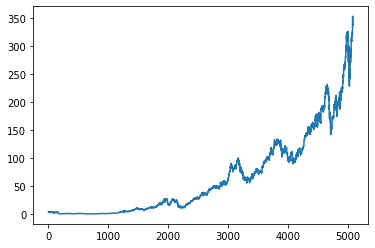

In [11]:
plt.plot(y)

In [12]:
x.shape

(5079, 16)

In [13]:
train = x.iloc[:n_train,:]
test = x.iloc[n_train:,:]

In [14]:
test.shape

(2032, 16)

In [15]:
a_train_y = y[:n_train]
train_y = a_train_y
a_test_y = y[n_train:]
test_y = a_test_y

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
test_y = scaler.fit_transform(np.array(test_y).reshape(-1,1))
train_y = scaler.transform(np.array(train_y).reshape(-1,1))

In [17]:
a_train_x = train
a_test_x = test

In [18]:
a_train_x

,open,low,high,bb_bbm,bb_bbh,bb_bbl,atr,macd,cci,ema,roc,sma12,sma5,stochastic_oscillator,mtm6,mtm12
0,4.0714,3.9755,4.1451,3.742555,4.258224,3.226886,0.258809,0.028209,108.782044,3.824942,3.199598,3.819608,3.85050,75.940406,10.722189,3.199598
1,4.0804,4.0179,4.1786,3.778050,4.267487,3.288613,0.251801,0.041007,99.551288,3.851270,6.000474,3.838583,3.94916,80.342311,12.344989,6.000474
2,4.0224,3.9130,4.0670,3.825040,4.222099,3.427981,0.244815,0.053055,72.677158,3.878247,1.115019,3.842308,4.02192,84.268815,14.862146,1.115019
3,4.0581,3.8706,4.0759,3.846470,4.205897,3.487043,0.241993,0.048361,40.605138,3.879014,-1.303585,3.838033,4.02728,62.924742,5.263158,-1.303585
4,3.9018,3.8840,4.1384,3.873925,4.233795,3.514055,0.242879,0.064250,80.649750,3.913306,5.284325,3.855333,4.03978,94.663982,7.233226,5.284325
5,4.1284,4.1161,4.2824,3.900820,4.287682,3.513958,0.237409,0.085045,138.698707,3.958198,17.096019,3.907042,4.06924,96.393589,4.327761,17.096019
6,4.2076,4.0089,4.2120,3.913990,4.304929,3.523051,0.237673,0.085945,79.482141,3.972999,9.818103,3.937358,4.07860,76.268923,-0.816535,9.818103
7,4.1161,4.0447,4.1239,3.916445,4.311455,3.521435,0.226353,0.088343,79.108264,3.990292,14.587756,3.980883,4.08842,79.997774,1.996321,14.587756
8,4.0893,3.9666,4.1206,3.916335,4.311281,3.521389,0.221185,0.078893,47.481847,3.988026,12.586779,4.017900,4.10628,61.905349,-1.980955,12.586779
9,3.9297,3.8148,4.1674,3.929840,4.325696,3.533984,0.230572,0.077889,42.035370,3.998263,10.163152,4.049150,4.09200,73.182154,4.654995,10.163152


In [19]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_a = scaler.fit_transform(a_train_x)
x_test_a = scaler.transform(a_test_x)

In [20]:
x_train_a.shape

(3047, 16)

In [21]:
autoencoder = AutoEncoder(10, x_train_a.shape[1])
autoencoder.build_model()

In [22]:
print('Training model...')
autoencoder.train_model(autoencoder.autoencoder, x_train_a, epochs=100, model_name='autoencoder')

Training model...
Epoch 1/100
3047/3047 [==============================] - 2s 536us/step - loss: 0.4261 - acc: 0.0466 - mae: 0.5475
Epoch 2/100
3047/3047 [==============================] - 1s 175us/step - loss: 0.4006 - acc: 0.2350 - mae: 0.5286 0s - loss: 0.4005 - acc: 0.2462 - mae: 0.5
Epoch 3/100
3047/3047 [==============================] - 1s 175us/step - loss: 0.3992 - acc: 0.1995 - mae: 0.5259
Epoch 4/100
3047/3047 [==============================] - 1s 198us/step - loss: 0.3985 - acc: 0.1926 - mae: 0.5244
Epoch 5/100
3047/3047 [==============================] - 1s 195us/step - loss: 0.3980 - acc: 0.1999 - mae: 0.5233
Epoch 6/100
3047/3047 [==============================] - 1s 168us/step - loss: 0.3976 - acc: 0.2061 - mae: 0.5222
Epoch 7/100
3047/3047 [==============================] - 0s 147us/step - loss: 0.3964 - acc: 0.2353 - mae: 0.5208
Epoch 8/100
3047/3047 [==============================] - 1s 180us/step - loss: 0.3846 - acc: 0.6291 - mae: 0.5062
Epoch 9/100
3047/3047 [====

3047/3047 [==============================] - 1s 182us/step - loss: 0.3816 - acc: 0.7404 - mae: 0.4941
Epoch 72/100
3047/3047 [==============================] - 1s 188us/step - loss: 0.3816 - acc: 0.7391 - mae: 0.4940
Epoch 73/100
3047/3047 [==============================] - 1s 180us/step - loss: 0.3816 - acc: 0.7391 - mae: 0.4940
Epoch 74/100
3047/3047 [==============================] - 1s 170us/step - loss: 0.3816 - acc: 0.7384 - mae: 0.4940
Epoch 75/100
3047/3047 [==============================] - 1s 201us/step - loss: 0.3816 - acc: 0.7411 - mae: 0.4940
Epoch 76/100
3047/3047 [==============================] - 0s 163us/step - loss: 0.3816 - acc: 0.7420 - mae: 0.4940
Epoch 77/100
3047/3047 [==============================] - 1s 173us/step - loss: 0.3816 - acc: 0.7427 - mae: 0.4940
Epoch 78/100
3047/3047 [==============================] - 1s 170us/step - loss: 0.3816 - acc: 0.7407 - mae: 0.4940
Epoch 79/100
3047/3047 [==============================] - 0s 137us/step - loss: 0.3816 - acc:

In [23]:
print('Testing model...')
autoencoder.test_model(autoencoder.autoencoder, x_test_a)

Testing model...
2032/2032 [==============================] - 0s 133us/step
[0.6403722793861167, 0.8252952694892883, 0.39791339635849]


In [24]:
a_scaled_full = pd.DataFrame(scaler.transform(x))

In [25]:
a_scaled_full.shape

(5079, 16)

In [26]:
autoencoder.encode_data(a_scaled_full, csv_path='./full_x.csv')

,0,1,2,3,4,5,6,7,8,9
0,0.136135,0.592276,1.035127,0.000000,1.045130,0.000000,0.000000,0.729582,0.532910,1.129910
1,0.139191,0.570039,0.984426,0.000000,1.047860,0.000000,0.000000,0.776938,0.559366,1.158163
2,0.139088,0.562624,1.012027,0.000000,1.025209,0.000000,0.000000,0.859197,0.552159,1.227446
3,0.101978,0.533991,1.139696,0.000000,0.862831,0.000000,0.000000,0.649261,0.534463,0.895877
4,0.160763,0.563942,0.993129,0.000000,1.110218,0.000000,0.000000,0.972462,0.589738,1.396203
5,0.172084,0.578965,0.886954,0.000000,1.207993,0.000000,0.000000,0.904435,0.632680,1.396103
6,0.131080,0.536715,1.034278,0.000000,1.004826,0.000000,0.000000,0.744236,0.597411,1.082430
7,0.132288,0.514377,0.956248,0.000000,1.015465,0.000000,0.000000,0.768789,0.631359,1.085616
8,0.096610,0.481285,1.036206,0.000000,0.862901,0.000000,0.000000,0.588565,0.616618,0.781967
9,0.113605,0.483211,0.995899,0.000000,0.915171,0.000000,0.000000,0.729335,0.611190,0.958295


In [27]:
df1 = pd.read_csv("./full_x.csv", index_col=0)
df2 = pd.DataFrame(y)

In [28]:
(df1.shape, df2.shape)

((5079, 10), (5079, 1))

In [29]:
train_x = df1.iloc[:n_train,:]
test_x = df1.iloc[n_train:, :]

In [30]:
'''fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, 
csv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)
y = pd.read_csv('sample_data/processed_data/rf_data/full_y.csv', index_col=0)
preprocess.check_labels(y)'''

'fulldata, y_values, train_x, train_y, test_x, test_y =  preprocess.make_train_test(df_x=df1, df_y=df2, window=1, \ncsv_path="sample_data/processed_data/rf_data", has_y=True, binary_y=True, save_csv=True)\ny = pd.read_csv(\'sample_data/processed_data/rf_data/full_y.csv\', index_col=0)\npreprocess.check_labels(y)'

In [31]:
'''train_x = pd.read_csv('sample_data/processed_data/rf_data/train_x.csv', index_col=0)
train_y = pd.read_csv('sample_data/processed_data/rf_data/train_y.csv', index_col=0)
test_x = pd.read_csv('sample_data/processed_data/rf_data/test_x.csv', index_col=0)
test_y = pd.read_csv('sample_data/processed_data/rf_data/test_y.csv', index_col=0)'''
train_x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.136135,0.592276,1.035127,0.0,1.045130,0.0,0.0,0.729582,0.532910,1.129910
1,0.139191,0.570039,0.984426,0.0,1.047860,0.0,0.0,0.776938,0.559366,1.158163
2,0.139088,0.562624,1.012027,0.0,1.025209,0.0,0.0,0.859197,0.552159,1.227446
3,0.101978,0.533991,1.139696,0.0,0.862831,0.0,0.0,0.649261,0.534463,0.895877
4,0.160763,0.563942,0.993129,0.0,1.110218,0.0,0.0,0.972462,0.589738,1.396203


In [32]:
val_x = test_x.iloc[:n_val,:]
test_x = test_x.iloc[n_val:,:]

In [33]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = scaler.fit_transform(train_x)
x_test = scaler.transform(test_x)
x_val = scaler.transform(val_x)

In [34]:
pd.DataFrame(x_val).max(axis=0)

0    11.813074
1     0.794615
2    -0.446531
3    14.415135
4     2.822003
5     3.686046
6    12.167271
7     3.533946
8    -1.000000
9     1.119686
dtype: float64

In [35]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.459827,0.287004,-0.074056,-1.0,0.355995,-1.0,-1.0,0.301446,0.002121,0.196840
1,-0.447700,0.238682,-0.119409,-1.0,0.359537,-1.0,-1.0,0.385920,0.051871,0.226768
2,-0.448108,0.222570,-0.094719,-1.0,0.330149,-1.0,-1.0,0.532657,0.038318,0.300154
3,-0.595360,0.160351,0.019484,-1.0,0.119472,-1.0,-1.0,0.158168,0.005042,-0.051056
4,-0.362102,0.225433,-0.111624,-1.0,0.440443,-1.0,-1.0,0.734700,0.108984,0.478907


In [36]:
#nnmodel = NNModel(x_train.shape[1])
#nnmodel.make_model()

#print('Training model...')
#nnmodel.train_model(x_train, train_y, model_name='nnmodel', epochs=1000)

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

In [38]:
len(x_train)

3047

In [39]:
X_train= np.reshape(x_train, (len(x_train), 1, x_train.shape[1]))
X_test=np.reshape(x_test, (len(x_test), 1, x_test.shape[1]))
X_val=np.reshape(x_val, (len(x_val), 1, x_val.shape[1]))

In [40]:
val_y = test_y[:n_val]
test_y = test_y[n_val:]

In [41]:
X_test.shape

(1017, 1, 10)

In [42]:
from keras.models import load_model
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [43]:
#model = load_model('./models/attempt1.h5')

In [44]:
neurons=60
dropout=0.20
model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons*2, return_sequences=True, activation='relu'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='relu'))
model.add(Dense(units=1))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 60)             17040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                43440     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [45]:
#scaler = MinMaxScaler(feature_range=(0, 1))

In [46]:
print(train_y.shape, test_y.shape)
print(X_train.shape, X_test.shape)
#train_y = np.array(scaler.fit_transform(np.array(train_y).reshape(-1,1)))
#test_y = np.array(scaler.fit_transform(np.array(test_y).reshape(-1,1)))

(3047, 1) (1017, 1)
(3047, 1, 10) (1017, 1, 10)


In [47]:
np.array(train_y)

array([[-0.17381206],
       [-0.17408241],
       [-0.17397736],
       ...,
       [ 0.10938101],
       [ 0.10423491],
       [ 0.10157989]])

In [48]:
es=EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

Train on 3047 samples, validate on 1015 samples
Epoch 1/1000
3047/3047 [==============================] - 8s 3ms/step - loss: 0.0215 - val_loss: 0.0202
Epoch 2/1000
3047/3047 [==============================] - 1s 476us/step - loss: 0.0215 - val_loss: 0.0202
Epoch 3/1000
3047/3047 [==============================] - 2s 503us/step - loss: 0.0215 - val_loss: 0.0202
Epoch 4/1000
3047/3047 [==============================] - 2s 516us/step - loss: 0.0215 - val_loss: 0.0202
Epoch 5/1000
3047/3047 [==============================] - 2s 495us/step - loss: 0.0215 - val_loss: 0.0202
Epoch 6/1000
3047/3047 [==============================] - 2s 517us/step - loss: 0.0215 - val_loss: 0.0202
Epoch 7/1000
3047/3047 [==============================] - 1s 454us/step - loss: 0.0215 - val_loss: 0.0202
Epoch 8/1000
3047/3047 [==============================] - 2s 580us/step - loss: 0.0215 - val_loss: 0.0202
Epoch 9/1000
3047/3047 [==============================] - 2s 511us/step - loss: 0.0215 - val_loss: 0.0202


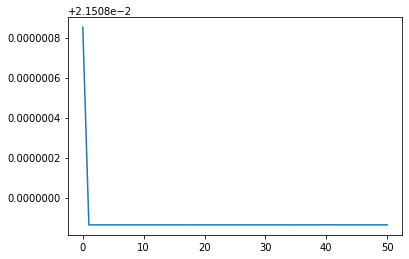

In [49]:
history = model.fit(X_train, train_y, epochs=1000, validation_data = (X_val, val_y), callbacks=[es])
model.save('./models/attempt9.h5')
plt.plot(history.history['loss'], label='train')

In [50]:
'''opt = Adam(learning_rate=0.1)
original_model = Sequential()
original_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activity_regularizer=regularizers.l2(0.03),
                       recurrent_regularizer=regularizers.l2(0.003), dropout=0.2))
original_model.add(Dense(50, activation="sigmoid", activity_regularizer=regularizers.l2(0.005)))
original_model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False, activity_regularizer=regularizers.l2(0.01),
                       recurrent_regularizer=regularizers.l2(0.001), dropout=0.2))
original_model.add(Dense(1, activation="relu", activity_regularizer=regularizers.l2(0.001)))
original_model.compile(loss='mse', optimizer=opt)
original_model.summary()'''

'opt = Adam(learning_rate=0.1)\noriginal_model = Sequential()\noriginal_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activity_regularizer=regularizers.l2(0.03),\n                       recurrent_regularizer=regularizers.l2(0.003), dropout=0.2))\noriginal_model.add(Dense(50, activation="sigmoid", activity_regularizer=regularizers.l2(0.005)))\noriginal_model.add(LSTM(20, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False, activity_regularizer=regularizers.l2(0.01),\n                       recurrent_regularizer=regularizers.l2(0.001), dropout=0.2))\noriginal_model.add(Dense(1, activation="relu", activity_regularizer=regularizers.l2(0.001)))\noriginal_model.compile(loss=\'mse\', optimizer=opt)\noriginal_model.summary()'

In [51]:
stop = time.time()

In [52]:
'''o_history = original_model.fit(X_train, train_y, epochs=1000)
original_model.save('./models/attempt2.h5')
plt.plot(o_history.history['loss'], label='train')'''

"o_history = original_model.fit(X_train, train_y, epochs=1000)\noriginal_model.save('./models/attempt2.h5')\nplt.plot(o_history.history['loss'], label='train')"

In [53]:
#plt.plot(o_history.history['loss'], label='train')

In [54]:
'''model.compile(optimizer = "adam", loss="mean_squared_error")
history = model.fit(X_train, train_y, epochs=5000)
model.save('./models/attempt1.h5')
plt.plot(history.history['loss'], label='train')'''

'model.compile(optimizer = "adam", loss="mean_squared_error")\nhistory = model.fit(X_train, train_y, epochs=5000)\nmodel.save(\'./models/attempt1.h5\')\nplt.plot(history.history[\'loss\'], label=\'train\')'

In [55]:
#nnmodel.test_model(x_test, test_y[1:])
pred_ret = model.predict(X_test)
#pred_ret = nnmodel.predict_ret(x_test, y=None)

In [56]:
'''pred = model.predict(X_train)
plt.plot(pred, color='r')
plt.plot(train_y, color='g')'''

"pred = model.predict(X_train)\nplt.plot(pred, color='r')\nplt.plot(train_y, color='g')"

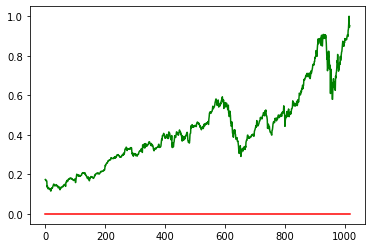

In [57]:
plt.plot(pred_ret, color='r')
plt.plot(np.array(test_y), color='g')
plt.show()

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
pred = scaler.fit_transform(np.array(pred_ret).reshape(-1,1))
actual = scaler.fit_transform(np.array(test_y).reshape(-1,1))

In [60]:
from sklearn.utils import check_array

In [61]:
pred_ret.shape

(1017, 1)

In [62]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    #y_true, y_pred = check_array(y_true, y_pred)
    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    diff = np.divide(np.abs(np.subtract(y_true, y_pred)), y_pred)
    print(diff)
    print(diff.shape)
    return np.mean(diff) * 100

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
mape = mean_absolute_percentage_error(np.array(test_y), pred_ret)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

[[inf]
 [inf]
 [inf]
 ...
 [inf]
 [inf]
 [inf]]
(1017, 1)
mse, rmse, mae:(0.17260273275480334, 0.4154548504408191, 0.35010975372011915)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [65]:
pd.Series(np.array(test_y)) - pd.Series(np.array(pred_ret))

Exception: Data must be 1-dimensional

In [66]:
stop - start

170.85129690170288